In [331]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, wordcloud

In [180]:
df = pd.read_csv('data/The-Office-Lines-V3.csv', encoding='latin-1')

In [226]:
# Ideas
# translation - how would jim say this sentence? 
# identification - who would say this sentence?
# completion - start a sentence and have someone finish it

In [181]:
df.isnull().sum()

season     0
episode    0
title      0
scene      0
speaker    0
line       0
dtype: int64

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54626 entries, 0 to 54625
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   54626 non-null  int64 
 1   episode  54626 non-null  int64 
 2   title    54626 non-null  object
 3   scene    54626 non-null  int64 
 4   speaker  54626 non-null  object
 5   line     54626 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.5+ MB


In [183]:
df.head()

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."


In [184]:
df['line'] = df['line'].str.lower()

In [185]:
df.head()

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,all right jim. your quarterlies look very good...
1,1,1,Pilot,1,Jim,"oh, i told you. i couldn't close it. so..."
2,1,1,Pilot,1,Michael,so you've come to the master for guidance? is ...
3,1,1,Pilot,1,Jim,"actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"all right. well, let me show you how it's done."


In [355]:
df.speaker.value_counts()

Michael                      10773
Dwight                        6752
Jim                           6222
Pam                           4973
Andy                          3698
                             ...  
Cleaning lady                    1
Together                         1
Patty                            1
Dwight, Erin, Jim & Kevin        1
Phyllis and Creed                1
Name: speaker, Length: 775, dtype: int64

In [186]:
twss_df = df[df['line'].str.contains("that's what she said")]
twss_df

,season,episode,title,scene,speaker,line
1885,2,2,Sexual Harassment,306,Michael,that's what she said. pam?
1931,2,2,Sexual Harassment,316,Jim,does that include 'that's what she said'?
1934,2,2,Sexual Harassment,316,Michael,that's what she said!
3965,2,10,Christmas Party,621,Michael,"a, that's what she said, and b, i wanted it to..."
4777,2,12,The Injury,752,Dwight,that's what she said.
5825,2,17,Dwight's Speech,953,Michael,that's what she said!
6799,2,21,Conflict Resolution,1128,Michael,"that's what she said. the thing is, angela......"
7450,3,1,Gay Witch Hunt,1264,Michael,i am glad that today spurred social change. th...
9996,3,10,A Benihana Christmas (Parts 1&2),1683,Michael,oh. that's what she said.
10563,3,13,Traveling Salesmen,1781,Dwight,that's what she said.


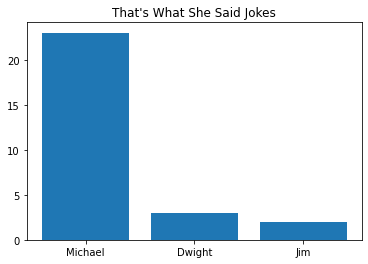

In [319]:
fig, ax = plt.subplots()
ax.bar(twss_df.speaker.value_counts().index[:3], twss_df.speaker.value_counts()[:3])
plt.title("That's What She Said Jokes")
plt.show()

In [220]:
twss_df2 = df[df['line'].str.startswith("that's what she said")]

In [221]:
lst = []
for i in twss_df2.iterrows():
    lst.append(i[0]-1)

In [222]:
setup_df = df.iloc[lst]
setup_df

,season,episode,title,scene,speaker,line
1884,2,2,Sexual Harassment,306,Jim,"no, thanks. i'm good."
1933,2,2,Sexual Harassment,316,Jim,wow! that is really hard. you really think you...
4776,2,12,The Injury,752,Doctor,does the skin look red and swollen?
5824,2,17,Dwight's Speech,952,Pam,i have a ton of stuff to do for the wedding. a...
6798,2,21,Conflict Resolution,1128,Angela,you already did me.
10562,3,13,Traveling Salesmen,1781,Michael,"ok, you know what? i want you to think about y..."
11447,3,18,Cocktails,1985,Jan,let's just blow this party off.
16339,4,11,Survivor Man,2763,Michael,i never know. i just say it. i say stuff like ...
16442,4,12,The Deposition,2786,Lester,and you were directly under her the entire time?
16444,4,12,The Deposition,2786,Lester,excuse me?


In [328]:
STOPWORDS.add('think')

In [329]:
text = " ".join(word for word in setup_df.line)

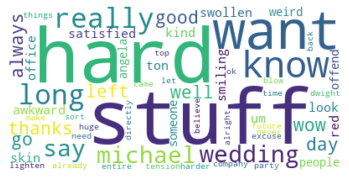

In [330]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

# Display the generated image:
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [354]:
df.speaker.value_counts().head(22).index

pandas.core.indexes.base.Index